# Business Problem

Suppose, an owner of a bike shop wants to rent bicycles to customers.
Now as a Data Scientist,I want to predict the the number of requsets for bicycles by customers based on some information you have.

So I will analyze this to a kind of linear regression with multiple features.

### Background
Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.



# Source of Data and attribute desrciption

https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

Attribute Information:

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Reading the Data 

In [ ]:
df = pd.read_csv("day.csv")
df.head()

In [3]:
df.shape

(731, 16)

In [4]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


# Converting date to pandas date format

In [7]:
df["pd_date"] = pd.to_datetime(df["dteday"])

In [8]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,pd_date
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011-01-01
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011-01-02
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011-01-03
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011-01-04
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011-01-05


In [9]:
df["week"]=df["pd_date"].dt.dayofweek

### according to data, sun = 0, sat =6, according to pandas date function , mon= 0, sun =6

In [10]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,pd_date,week
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011-01-01,5
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011-01-02,6
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011-01-03,0
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011-01-04,1
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011-01-05,2


In [11]:
df["Week_day"] = df["week"].map({
    0:"mon",
    1:"tue",
    2:"wed",
    3:"thur",
    4:"fri",
    5:"sat",
    6:"sun"
})

In [12]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,pd_date,week,Week_day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011-01-01,5,sat
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011-01-02,6,sun
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011-01-03,0,mon
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011-01-04,1,tue
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011-01-05,2,wed


In [13]:
df[(df.holiday==0) & (df.workingday==0)]["Week_day"].value_counts()

sat    105
sun    105
Name: Week_day, dtype: int64

In [14]:
df[(df.holiday==1) & (df.workingday==0)]["Week_day"].value_counts()

mon     15
thur     2
fri      2
wed      1
tue      1
Name: Week_day, dtype: int64

In [15]:
df[(df.workingday==0)]["Week_day"].value_counts()

sat     105
sun     105
mon      15
fri       2
thur      2
wed       1
tue       1
Name: Week_day, dtype: int64

In [16]:
df[(df.holiday==0) & (df.workingday==1)]["Week_day"].value_counts()

wed     103
tue     103
fri     102
thur    102
mon      90
Name: Week_day, dtype: int64

# Creating a column named weekened

In [17]:
def weekend(day):
    if(day in ["sat","sun"]):
        return 1
    else:
        return 0

In [18]:
df["weekend"]=df["Week_day"].apply(weekend)

In [19]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,pd_date,week,Week_day,weekend
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011-01-01,5,sat,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011-01-02,6,sun,1
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011-01-03,0,mon,0
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011-01-04,1,tue,0
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011-01-05,2,wed,0


# Creating a column named daytype

In [20]:
#weekend = 1, weekday_holiday=2, normal_workingday = 3

In [21]:
def daytype(df):
    if (df["holiday"]==0) & (df["workingday"]==0):
        return 1
    elif (df["holiday"]==1) & (df["workingday"]==0):
        return 2
    elif (df["holiday"]==0) & (df["workingday"]==1):
        return 3

In [22]:
df['daytype'] = df.apply(daytype, axis=1)

In [23]:
df.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,pd_date,week,Week_day,weekend,daytype
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,...,0.805833,0.160446,331,654,985,2011-01-01,5,sat,1,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,...,0.696087,0.248539,131,670,801,2011-01-02,6,sun,1,1
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,...,0.437273,0.248309,120,1229,1349,2011-01-03,0,mon,0,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,...,0.590435,0.160296,108,1454,1562,2011-01-04,1,tue,0,3
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,...,0.436957,0.186900,82,1518,1600,2011-01-05,2,wed,0,3
5,6,1/6/2011,1,0,1,0,4,1,1,0.204348,...,0.518261,0.089565,88,1518,1606,2011-01-06,3,thur,0,3
6,7,1/7/2011,1,0,1,0,5,1,2,0.196522,...,0.498696,0.168726,148,1362,1510,2011-01-07,4,fri,0,3
7,8,1/8/2011,1,0,1,0,6,0,2,0.165000,...,0.535833,0.266804,68,891,959,2011-01-08,5,sat,1,1
8,9,1/9/2011,1,0,1,0,0,0,1,0.138333,...,0.434167,0.361950,54,768,822,2011-01-09,6,sun,1,1
9,10,1/10/2011,1,0,1,0,1,1,1,0.150833,...,0.482917,0.223267,41,1280,1321,2011-01-10,0,mon,0,3


# EDA

In [24]:
df["season"].value_counts()

3    188
2    184
1    181
4    178
Name: season, dtype: int64

<AxesSubplot:xlabel='season', ylabel='count'>

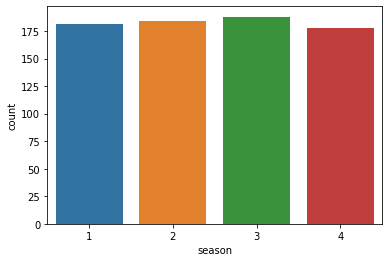

In [25]:
sns.countplot(data = df,x="season")

In [26]:
df["yr"].value_counts()

1    366
0    365
Name: yr, dtype: int64

<AxesSubplot:xlabel='yr', ylabel='count'>

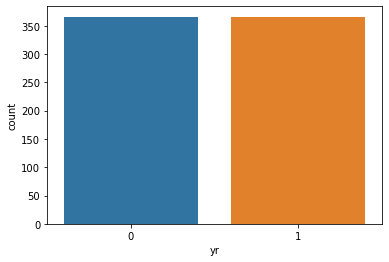

In [27]:
sns.countplot(data = df,x="yr")

In [28]:
df["mnth"].value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     57
Name: mnth, dtype: int64

<AxesSubplot:xlabel='mnth', ylabel='count'>

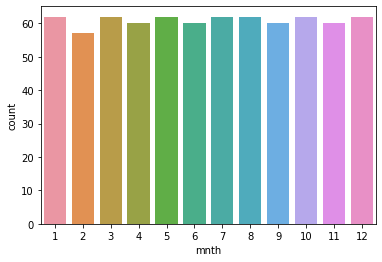

In [29]:
sns.countplot(data = df,x="mnth")

In [30]:
#df["hr"].value_counts()

In [31]:
#sns.countplot(data = df,x="hr")

In [32]:
df["holiday"].value_counts()

0    710
1     21
Name: holiday, dtype: int64

<AxesSubplot:xlabel='holiday', ylabel='count'>

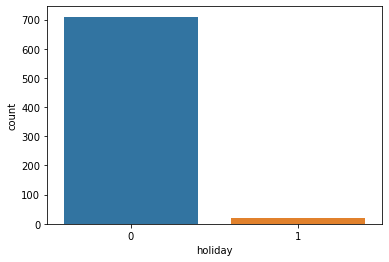

In [33]:
sns.countplot(data = df,x="holiday")

<AxesSubplot:xlabel='season'>

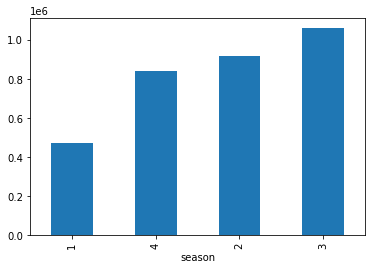

In [34]:
df.groupby(["season"])["cnt"].sum().sort_values().plot(kind="bar")

<AxesSubplot:xlabel='mnth'>

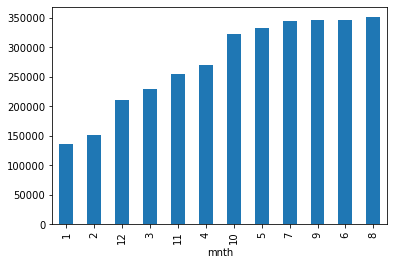

In [35]:
df.groupby(["mnth"])["cnt"].sum().sort_values().plot(kind="bar")

<AxesSubplot:xlabel='yr'>

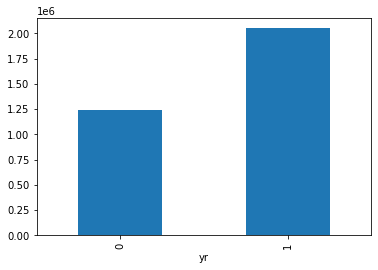

In [36]:
df.groupby(["yr"])["cnt"].sum().sort_values().plot(kind="bar")

<AxesSubplot:xlabel='Week_day'>

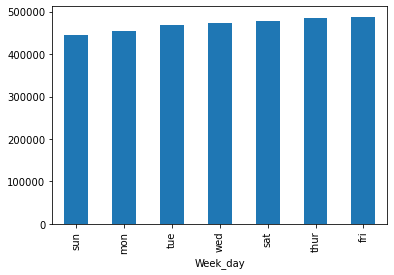

In [37]:
df.groupby(["Week_day"])["cnt"].sum().sort_values().plot(kind="bar")

<AxesSubplot:xlabel='weathersit'>

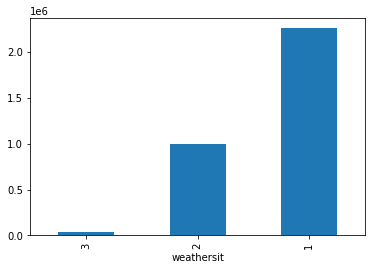

In [38]:
df.groupby(["weathersit"])["cnt"].sum().sort_values().plot(kind="bar")

In [39]:
df.groupby(["weathersit"])["cnt"].sum().sort_values()

weathersit
3      37869
2     996858
1    2257952
Name: cnt, dtype: int64

In [40]:
df.corr()["cnt"].sort_values(ascending = False)

cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
instant       0.628830
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
daytype       0.050377
week         -0.003985
weekend      -0.037604
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64

In [41]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,pd_date,week,Week_day,weekend,daytype
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,...,0.805833,0.160446,331,654,985,2011-01-01,5,sat,1,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,...,0.696087,0.248539,131,670,801,2011-01-02,6,sun,1,1
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,...,0.437273,0.248309,120,1229,1349,2011-01-03,0,mon,0,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,...,0.590435,0.160296,108,1454,1562,2011-01-04,1,tue,0,3
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,...,0.436957,0.186900,82,1518,1600,2011-01-05,2,wed,0,3


In [42]:
df[["temp","atemp","hum","windspeed"]].describe()

,temp,atemp,hum,windspeed
count,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486
std,0.183051,0.162961,0.142429,0.077498
min,0.059130,0.079070,0.000000,0.022392
25%,0.337083,0.337842,0.520000,0.134950
50%,0.498333,0.486733,0.626667,0.180975
75%,0.655417,0.608602,0.730209,0.233214
max,0.861667,0.840896,0.972500,0.507463


In [43]:
df["atemp"].unique()

array([0.363625 , 0.353739 , 0.189405 , 0.212122 , 0.22927  , 0.233209 ,
       0.208839 , 0.162254 , 0.116175 , 0.150888 , 0.191464 , 0.160473 ,
       0.150883 , 0.188413 , 0.248112 , 0.234217 , 0.176771 , 0.232333 ,
       0.298422 , 0.25505  , 0.157833 , 0.0790696, 0.0988391, 0.11793  ,
       0.234526 , 0.2036   , 0.2197   , 0.223317 , 0.212126 , 0.250322 ,
       0.18625  , 0.23453  , 0.254417 , 0.177878 , 0.228587 , 0.243058 ,
       0.291671 , 0.303658 , 0.198246 , 0.144283 , 0.149548 , 0.213509 ,
       0.232954 , 0.324113 , 0.39835  , 0.254274 , 0.3162   , 0.428658 ,
       0.511983 , 0.391404 , 0.27733  , 0.284075 , 0.186033 , 0.245717 ,
       0.289191 , 0.350461 , 0.282192 , 0.351109 , 0.400118 , 0.263879 ,
       0.320071 , 0.200133 , 0.255679 , 0.378779 , 0.366252 , 0.238461 ,
       0.3024   , 0.286608 , 0.385668 , 0.305    , 0.32575  , 0.380091 ,
       0.332    , 0.318178 , 0.36693  , 0.410333 , 0.527009 , 0.466525 ,
       0.409735 , 0.440642 , 0.337939 , 0.270833 , 

# Boxplot of temp,atemp,hum and windspeed

<AxesSubplot:xlabel='temp'>

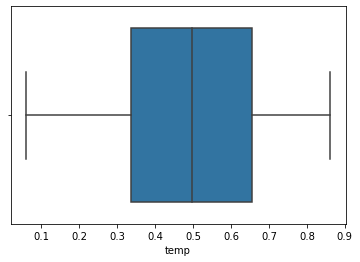

In [44]:
sns.boxplot(data=df,x="temp")

<AxesSubplot:xlabel='atemp'>

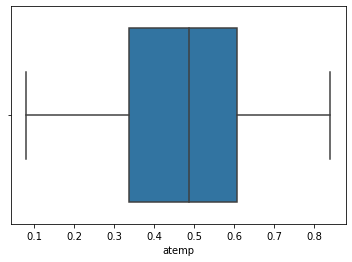

In [45]:
sns.boxplot(data=df,x="atemp")

<AxesSubplot:xlabel='hum'>

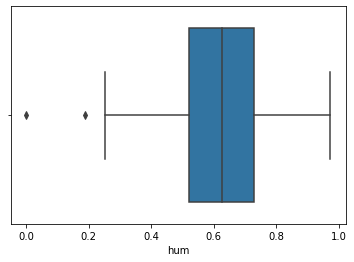

In [46]:
sns.boxplot(data=df,x="hum")

<AxesSubplot:xlabel='windspeed'>

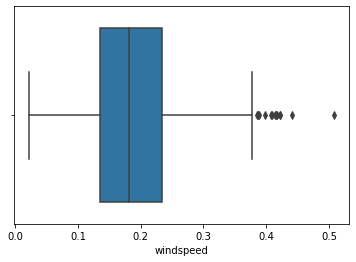

In [47]:
sns.boxplot(data=df,x="windspeed")

In [48]:
df[df["windspeed"]==0]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,pd_date,week,Week_day,weekend,daytype


In [49]:
df[["temp","hum","windspeed","season","weathersit"]].corr()

,temp,hum,windspeed,season,weathersit
temp,1.000000,0.126963,-0.157944,0.334315,-0.120602
hum,0.126963,1.000000,-0.248489,0.205445,0.591045
windspeed,-0.157944,-0.248489,1.000000,-0.229046,0.039511
season,0.334315,0.205445,-0.229046,1.000000,0.019211
weathersit,-0.120602,0.591045,0.039511,0.019211,1.000000


# Distribution plot of temp,atemp,hum

C:\Users\Preetam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='temp', ylabel='Density'>

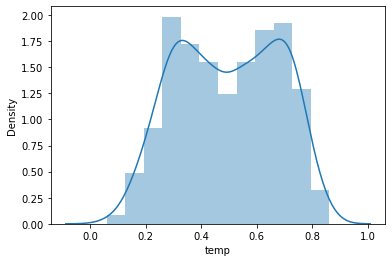

In [50]:

sns.distplot(df["temp"])

C:\Users\Preetam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='atemp', ylabel='Density'>

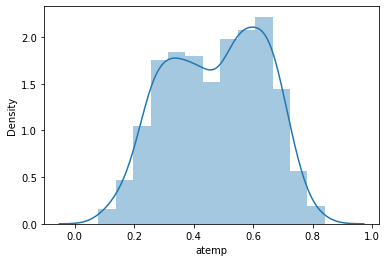

In [51]:
sns.distplot(df["atemp"])

C:\Users\Preetam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hum', ylabel='Density'>

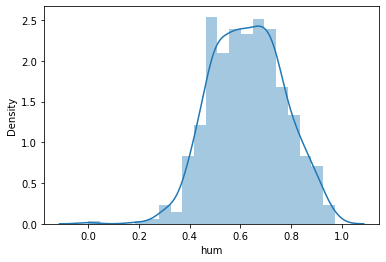

In [52]:
sns.distplot(df["hum"])

# replacing zero values of windspeed by mean and median

In [53]:
df["windspeed_mean"] = df["windspeed"].map(lambda x: df.windspeed.mean() if x ==0 else x)
df["windspeed_mean"]

0      0.160446
1      0.248539
2      0.248309
3      0.160296
4      0.186900
         ...   
726    0.350133
727    0.155471
728    0.124383
729    0.350754
730    0.154846
Name: windspeed_mean, Length: 731, dtype: float64

C:\Users\Preetam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='windspeed_mean', ylabel='Density'>

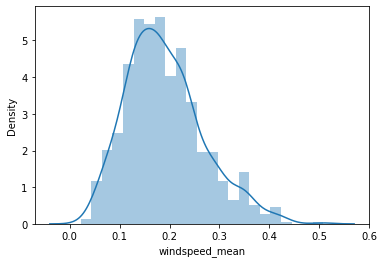

In [54]:
sns.distplot(df["windspeed_mean"])

In [55]:
df["windspeed_median"] = df["windspeed"].map(lambda x: df.windspeed.median() if x ==0 else x)
df["windspeed_median"]

0      0.160446
1      0.248539
2      0.248309
3      0.160296
4      0.186900
         ...   
726    0.350133
727    0.155471
728    0.124383
729    0.350754
730    0.154846
Name: windspeed_median, Length: 731, dtype: float64

C:\Users\Preetam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='windspeed_median', ylabel='Density'>

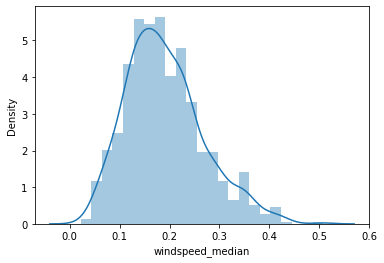

In [56]:
sns.distplot(df["windspeed_median"])

C:\Users\Preetam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Preetam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='windspeed_mean', ylabel='Density'>

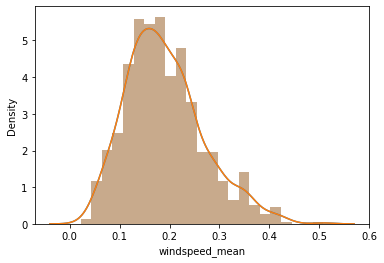

In [57]:
sns.distplot(df["windspeed_median"])
sns.distplot(df["windspeed_mean"])

# replacing zero values of hum by mean and median

In [58]:
df[df["hum"]==0]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,casual,registered,cnt,pd_date,week,Week_day,weekend,daytype,windspeed_mean,windspeed_median
68,69,3/10/2011,1,0,3,0,4,1,3,0.389091,...,46,577,623,2011-03-10,3,thur,0,3,0.261877,0.261877


In [59]:
df["hum_median"] = df["hum"].map(lambda x: df.hum.median() if x ==0 else x)
df["hum_median"]

0      0.805833
1      0.696087
2      0.437273
3      0.590435
4      0.436957
         ...   
726    0.652917
727    0.590000
728    0.752917
729    0.483333
730    0.577500
Name: hum_median, Length: 731, dtype: float64

In [60]:
df["hum_mean"] = df["hum"].map(lambda x: df.hum.mean() if x ==0 else x)
df["hum_mean"]

0      0.805833
1      0.696087
2      0.437273
3      0.590435
4      0.436957
         ...   
726    0.652917
727    0.590000
728    0.752917
729    0.483333
730    0.577500
Name: hum_mean, Length: 731, dtype: float64

C:\Users\Preetam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Preetam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hum_mean', ylabel='Density'>

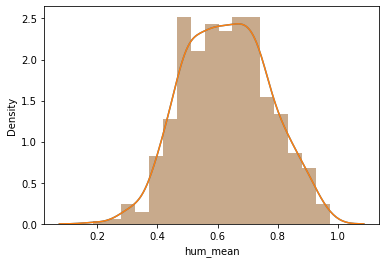

In [61]:
sns.distplot(df["hum_median"])
sns.distplot(df["hum_mean"])

C:\Users\Preetam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hum_mean', ylabel='Density'>

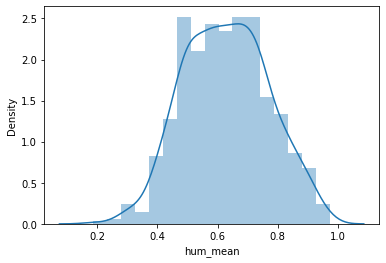

In [62]:
sns.distplot(df["hum_mean"])

C:\Users\Preetam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hum_median', ylabel='Density'>

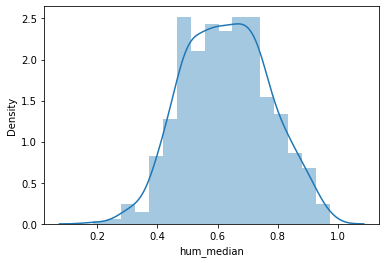

In [63]:
sns.distplot(df["hum_median"])

In [64]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,cnt,pd_date,week,Week_day,weekend,daytype,windspeed_mean,windspeed_median,hum_median,hum_mean
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,...,985,2011-01-01,5,sat,1,1,0.160446,0.160446,0.805833,0.805833
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,...,801,2011-01-02,6,sun,1,1,0.248539,0.248539,0.696087,0.696087
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,...,1349,2011-01-03,0,mon,0,3,0.248309,0.248309,0.437273,0.437273
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,...,1562,2011-01-04,1,tue,0,3,0.160296,0.160296,0.590435,0.590435
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,...,1600,2011-01-05,2,wed,0,3,0.186900,0.186900,0.436957,0.436957


# One hot encoding for weekday

In [65]:
df1 = pd.get_dummies(df, columns = ['Week_day'])

In [66]:
df1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,windspeed_median,hum_median,hum_mean,Week_day_fri,Week_day_mon,Week_day_sat,Week_day_sun,Week_day_thur,Week_day_tue,Week_day_wed
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,...,0.160446,0.805833,0.805833,0,0,1,0,0,0,0
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,...,0.248539,0.696087,0.696087,0,0,0,1,0,0,0
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,...,0.248309,0.437273,0.437273,0,1,0,0,0,0,0
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,...,0.160296,0.590435,0.590435,0,0,0,0,0,1,0
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,...,0.186900,0.436957,0.436957,0,0,0,0,0,0,1


In [67]:
fri_hol=df1[(df1["Week_day_fri"]==1) & (df["holiday"]==1)]

In [68]:
mon_hol=df1[(df1["Week_day_mon"]==1) & (df["holiday"]==1)]

In [69]:
fri_hol["cnt"]

104    3126
314    3368
Name: cnt, dtype: int64

In [70]:
mon_hol["cnt"]

16     1000
51     1107
149    4098
184    6043
247    3351
282    5117
359    1317
366    1951
380    2298
415    3129
471    6370
513    6043
611    6034
646    5478
681    6269
Name: cnt, dtype: int64

C:\Users\Preetam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='casual', ylabel='Density'>

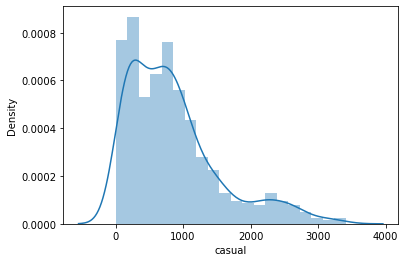

In [71]:
sns.distplot(df["casual"])

C:\Users\Preetam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='registered', ylabel='Density'>

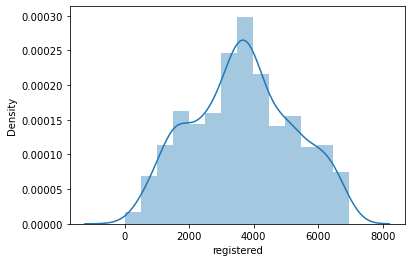

In [72]:
sns.distplot(df["registered"])

### Statistical Test

In [73]:
df["temp"].corr(df["atemp"])

0.991701553229463

<AxesSubplot:xlabel='temp', ylabel='atemp'>

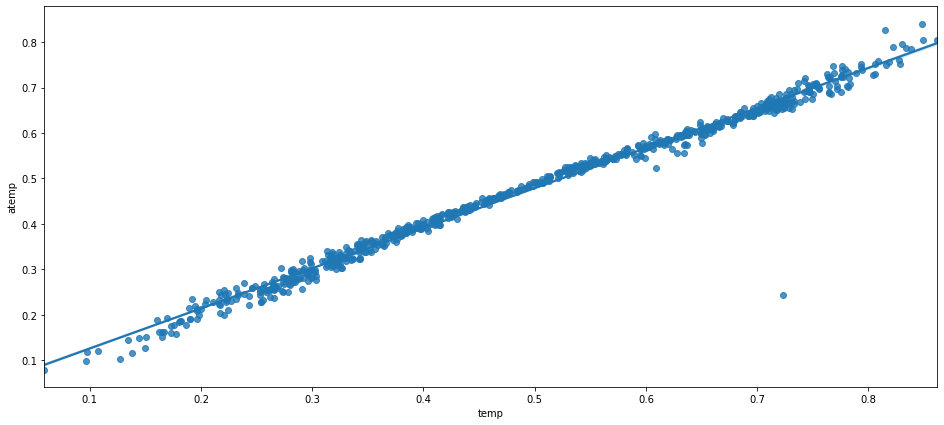

In [74]:
plt.figure(figsize=(16,7))
sns.regplot(x=df["temp"],y=df["atemp"])

In [75]:
df["hum"].corr(df["windspeed"])

-0.248489098643714

<AxesSubplot:xlabel='hum', ylabel='windspeed'>

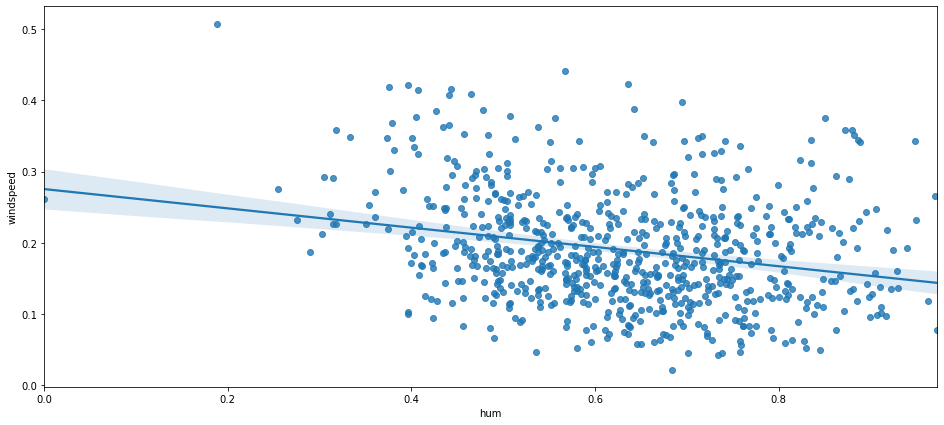

In [76]:
plt.figure(figsize=(16,7))
sns.regplot(x=df["hum"],y=df["windspeed"])

In [77]:
df["casual"].corr(df["registered"])

0.39528245086046415

<AxesSubplot:xlabel='casual', ylabel='registered'>

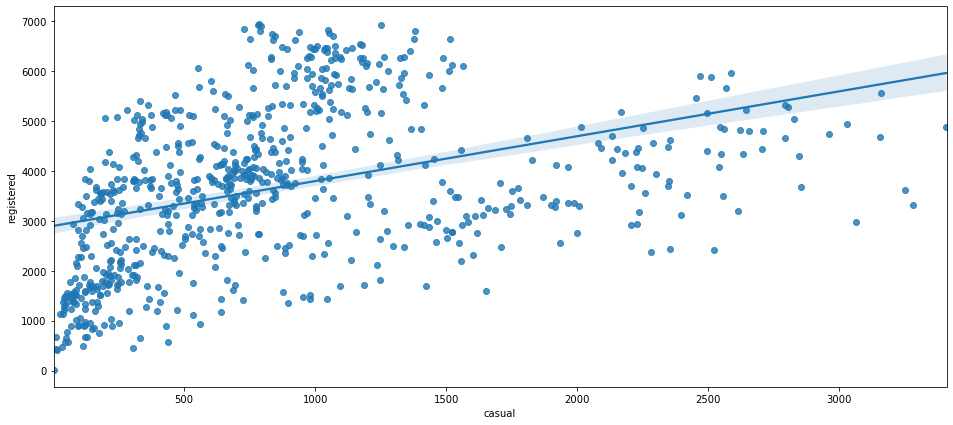

In [78]:
plt.figure(figsize=(16,7))
sns.regplot(x=df["casual"],y=df["registered"])

In [79]:
from scipy import stats

In [80]:
stats.pearsonr(df["temp"],df["atemp"])

(0.9917015532294637, 0.0)

# Checking Pearson product-moment correlation coefficient (PPMCC) 

In [81]:
def corr_two_var(X1,X2):
    #return df[X1].corr(df[X2])
    s=stats.pearsonr(df[X1],df[X2])
    print(s)
    print()
    if s[1]<0.05:
        print(X1, "and", X2 ,"have association.") 

In [82]:
corr_two_var("temp","atemp")

(0.9917015532294637, 0.0)

temp and atemp have association.


In [83]:
corr_two_var("hum","windspeed")

(-0.24848909864371405, 9.487955991301833e-12)

hum and windspeed have association.


In [84]:
corr_two_var("casual","registered")

(0.39528245086046404, 9.454275726764496e-29)

casual and registered have association.


In [85]:
corr_two_var("temp","windspeed")

(-0.15794412041209957, 1.7868574360644856e-05)

temp and windspeed have association.


In [86]:
corr_two_var("temp","hum")

(0.12696293902718872, 0.0005800887705373723)

temp and hum have association.


### Bivariate analysis

In [87]:
def sns_regplot(X):
    plt.figure(figsize=(16,8))
    sns.regplot(data=df,x=X,y="cnt")

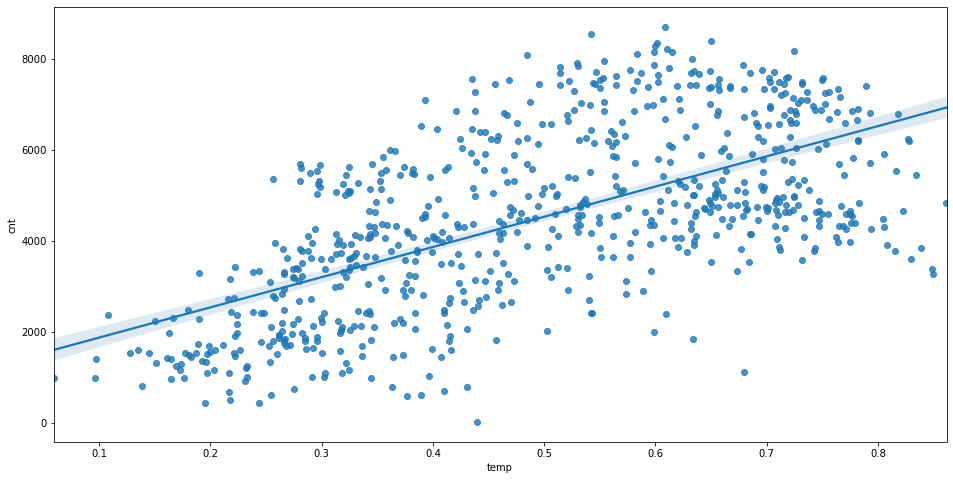

In [88]:
sns_regplot("temp")

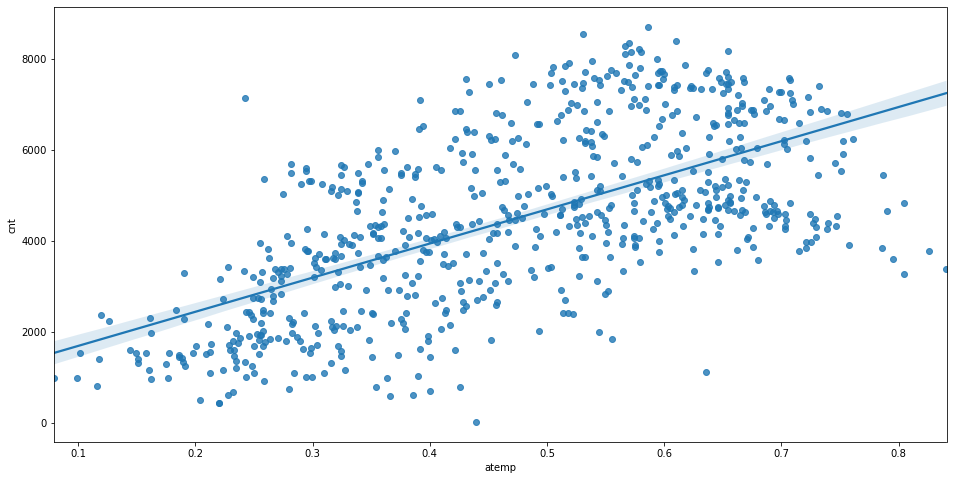

In [89]:
sns_regplot("atemp")

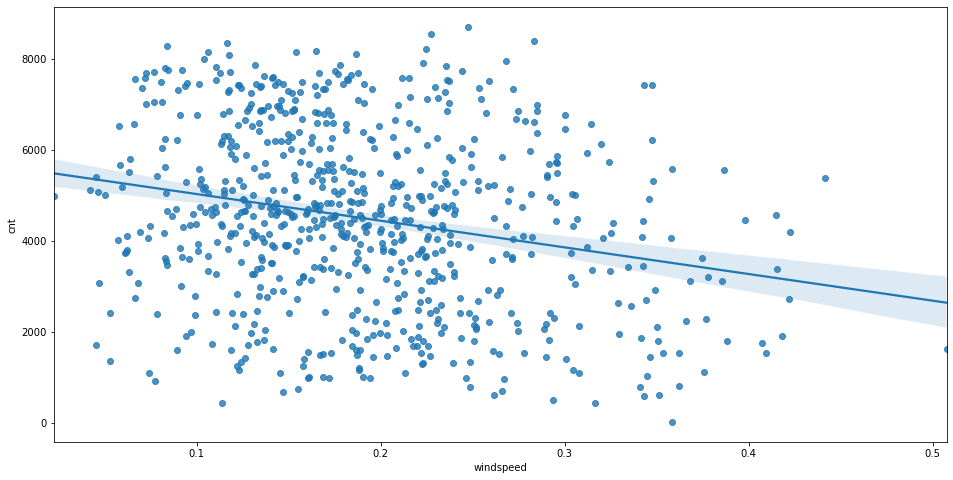

In [90]:
sns_regplot("windspeed")

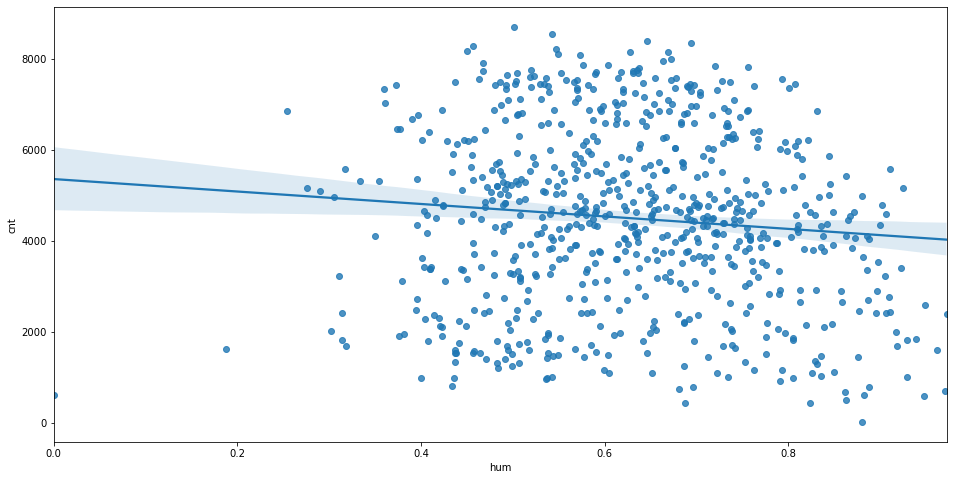

In [91]:
sns_regplot("hum")

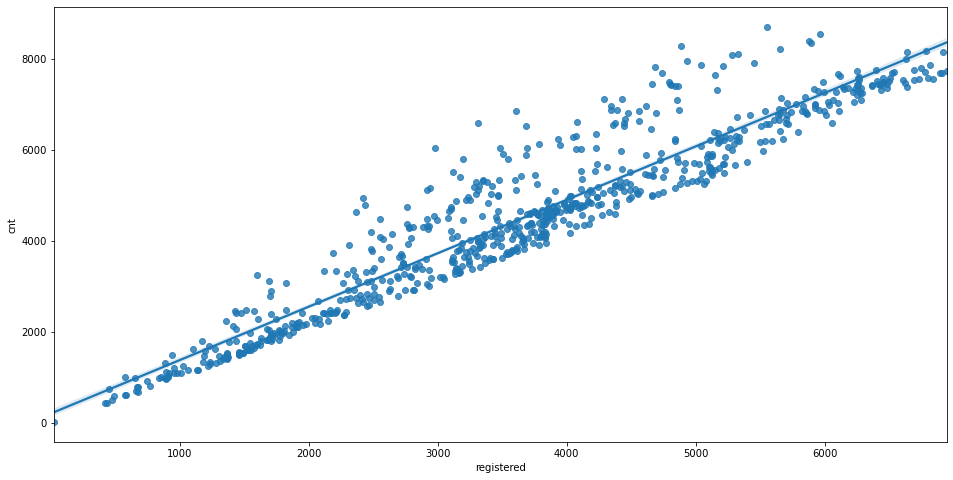

In [92]:
sns_regplot("registered")

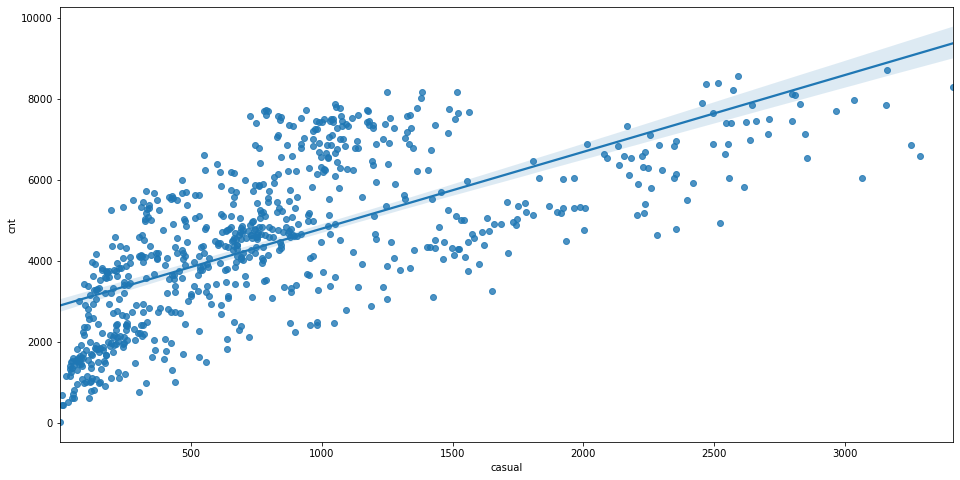

In [93]:
sns_regplot("casual")

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
lr=LinearRegression()

In [96]:
lr.fit(df["temp"].values.reshape(-1,1),df["cnt"].values.reshape(-1,1))

LinearRegression()

In [97]:
print('slope:',lr.coef_[0][0])

slope: 6640.709998548636


In [98]:
print('intercept:',lr.intercept_[0])

intercept: 1214.6421190294022


In [99]:
r_sq=lr.score(df["temp"].values.reshape(-1,1),df["cnt"].values.reshape(-1,1))
print("coefficient of determination:" ,r_sq)

coefficient of determination: 0.3937487313729241


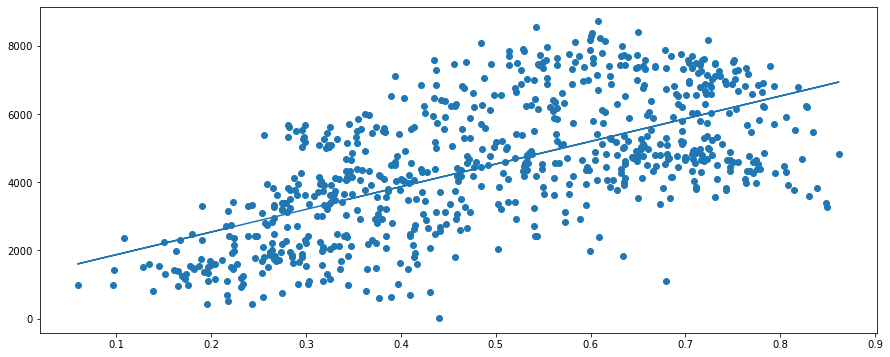

In [100]:
plt.figure(figsize=(15,6))
plt.scatter(x=df["temp"],y=df["cnt"])
plt.plot(df["temp"],lr.intercept_[0]+ lr.coef_[0][0] * df["temp"])

In [101]:
lr.fit(df["hum"].values.reshape(-1,1),df["cnt"].values.reshape(-1,1))

LinearRegression()

In [102]:
print('slope:',lr.coef_[0][0])

slope: -1369.080657896188


In [103]:
print('intercept:',lr.intercept_[0])

intercept: 5363.986453971191


In [104]:
r_sq=lr.score(df["hum"].values.reshape(-1,1),df["cnt"].values.reshape(-1,1))
print("coefficient of determination:" ,r_sq)

coefficient of determination: 0.010132146131519582


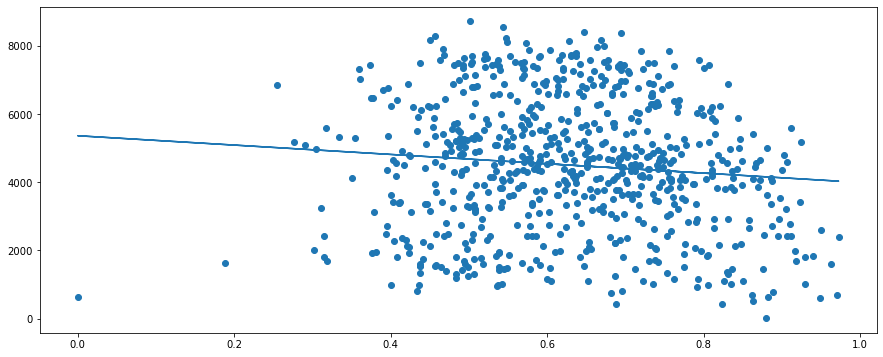

In [105]:
plt.figure(figsize=(15,6))
plt.scatter(x=df["hum"],y=df["cnt"])
plt.plot(df["hum"],lr.intercept_[0]+ lr.coef_[0][0] * df["hum"])

In [106]:
lr.fit(df["windspeed"].values.reshape(-1,1),df["cnt"].values.reshape(-1,1))

LinearRegression()

In [107]:
print('slope:',lr.coef_[0][0])

slope: -5862.912760422776


In [108]:
print('intercept:',lr.intercept_[0])

intercept: 5621.152878047152


In [109]:
r_sq=lr.score(df["windspeed"].values.reshape(-1,1),df["cnt"].values.reshape(-1,1))
print("coefficient of determination:" ,r_sq)

coefficient of determination: 0.05501135581553118


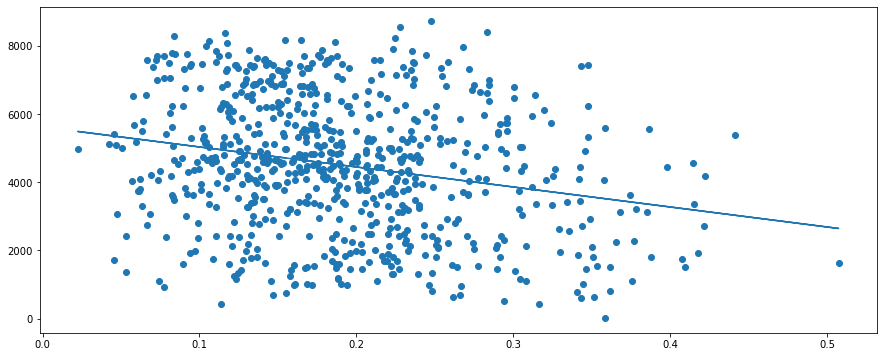

In [110]:
plt.figure(figsize=(15,6))
plt.scatter(x=df["windspeed"],y=df["cnt"])
plt.plot(df["windspeed"],lr.intercept_[0]+ lr.coef_[0][0] * df["windspeed"])

In [111]:
import statsmodels.api as sm

In [112]:
def reg_summary(X,y):
    x=df[X]
    y=df[y]
    x1=sm.add_constant(x)
    print(x1)
    result=sm.OLS(y,x1).fit()
    print(result.summary())

In [113]:
reg_summary("windspeed","cnt")

     const  windspeed
0      1.0   0.160446
1      1.0   0.248539
2      1.0   0.248309
3      1.0   0.160296
4      1.0   0.186900
..     ...        ...
726    1.0   0.350133
727    1.0   0.155471
728    1.0   0.124383
729    1.0   0.350754
730    1.0   0.154846

[731 rows x 2 columns]
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     42.44
Date:                Thu, 19 May 2022   Prob (F-statistic):           1.36e-10
Time:                        15:20:25   Log-Likelihood:                -6549.0
No. Observations:                 731   AIC:                         1.310e+04
Df Residuals:                     729   BIC:                         1.311e+04
Df Model:                           1                                         
C

In [114]:
reg_summary("temp","cnt")

     const      temp
0      1.0  0.344167
1      1.0  0.363478
2      1.0  0.196364
3      1.0  0.200000
4      1.0  0.226957
..     ...       ...
726    1.0  0.254167
727    1.0  0.253333
728    1.0  0.253333
729    1.0  0.255833
730    1.0  0.215833

[731 rows x 2 columns]
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     473.5
Date:                Thu, 19 May 2022   Prob (F-statistic):           2.81e-81
Time:                        15:20:25   Log-Likelihood:                -6386.8
No. Observations:                 731   AIC:                         1.278e+04
Df Residuals:                     729   BIC:                         1.279e+04
Df Model:                           1                                         
Covariance Ty

In [115]:
reg_summary("atemp","cnt")

     const     atemp
0      1.0  0.363625
1      1.0  0.353739
2      1.0  0.189405
3      1.0  0.212122
4      1.0  0.229270
..     ...       ...
726    1.0  0.226642
727    1.0  0.255046
728    1.0  0.242400
729    1.0  0.231700
730    1.0  0.223487

[731 rows x 2 columns]
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     482.5
Date:                Thu, 19 May 2022   Prob (F-statistic):           1.85e-82
Time:                        15:20:25   Log-Likelihood:                -6384.0
No. Observations:                 731   AIC:                         1.277e+04
Df Residuals:                     729   BIC:                         1.278e+04
Df Model:                           1                                         
Covariance Ty

In [116]:
reg_summary("hum","cnt")

     const       hum
0      1.0  0.805833
1      1.0  0.696087
2      1.0  0.437273
3      1.0  0.590435
4      1.0  0.436957
..     ...       ...
726    1.0  0.652917
727    1.0  0.590000
728    1.0  0.752917
729    1.0  0.483333
730    1.0  0.577500

[731 rows x 2 columns]
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     7.462
Date:                Thu, 19 May 2022   Prob (F-statistic):            0.00645
Time:                        15:20:25   Log-Likelihood:                -6566.0
No. Observations:                 731   AIC:                         1.314e+04
Df Residuals:                     729   BIC:                         1.315e+04
Df Model:                           1                                         
Covariance Ty

In [117]:
reg_summary("casual","cnt")

     const  casual
0      1.0     331
1      1.0     131
2      1.0     120
3      1.0     108
4      1.0      82
..     ...     ...
726    1.0     247
727    1.0     644
728    1.0     159
729    1.0     364
730    1.0     439

[731 rows x 2 columns]
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     602.9
Date:                Thu, 19 May 2022   Prob (F-statistic):           1.72e-97
Time:                        15:20:25   Log-Likelihood:                -6349.4
No. Observations:                 731   AIC:                         1.270e+04
Df Residuals:                     729   BIC:                         1.271e+04
Df Model:                           1                                         
Covariance Type:            nonrobust

In [118]:
reg_summary("registered","cnt")

     const  registered
0      1.0         654
1      1.0         670
2      1.0        1229
3      1.0        1454
4      1.0        1518
..     ...         ...
726    1.0        1867
727    1.0        2451
728    1.0        1182
729    1.0        1432
730    1.0        2290

[731 rows x 2 columns]
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     6149.
Date:                Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                        15:20:25   Log-Likelihood:                -5749.4
No. Observations:                 731   AIC:                         1.150e+04
Df Residuals:                     729   BIC:                         1.151e+04
Df Model:                           1                               

### Hypothesis Testing

## T-test for mean

In [119]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,cnt,pd_date,week,Week_day,weekend,daytype,windspeed_mean,windspeed_median,hum_median,hum_mean
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,...,985,2011-01-01,5,sat,1,1,0.160446,0.160446,0.805833,0.805833
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,...,801,2011-01-02,6,sun,1,1,0.248539,0.248539,0.696087,0.696087
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,...,1349,2011-01-03,0,mon,0,3,0.248309,0.248309,0.437273,0.437273
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,...,1562,2011-01-04,1,tue,0,3,0.160296,0.160296,0.590435,0.590435
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,...,1600,2011-01-05,2,wed,0,3,0.186900,0.186900,0.436957,0.436957


In [120]:
df["Week_day"].unique()

array(['sat', 'sun', 'mon', 'tue', 'wed', 'thur', 'fri'], dtype=object)

In [121]:
## df[(df["Week_day"]=="sun") | (df["Week_day"]=="sat")]

In [122]:
df["weekend"]= df["Week_day"].map({
    "sat":1,
    "sun":1,
    "mon":0,
    "tue":0,
    "wed":0,
    "thur":0,
    "fri":0
}
)

In [123]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,cnt,pd_date,week,Week_day,weekend,daytype,windspeed_mean,windspeed_median,hum_median,hum_mean
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,...,985,2011-01-01,5,sat,1,1,0.160446,0.160446,0.805833,0.805833
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,...,801,2011-01-02,6,sun,1,1,0.248539,0.248539,0.696087,0.696087
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,...,1349,2011-01-03,0,mon,0,3,0.248309,0.248309,0.437273,0.437273
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,...,1562,2011-01-04,1,tue,0,3,0.160296,0.160296,0.590435,0.590435
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,...,1600,2011-01-05,2,wed,0,3,0.186900,0.186900,0.436957,0.436957


In [124]:
#def day_category():
    #if df[(df["holiday"]==0) & (df["workingday"]==0)]:
        #df["weekend"]=1

In [125]:
#df[(df["holiday"]==0) & (df["workingday"]==0)]

In [126]:
testing_col=["yr","holiday","workingday","weekend"]

In [127]:
def t_test(col):
    if col in testing_col:
        x=df.groupby([col])["cnt"]
        t1=x.get_group(1)
        t0=x.get_group(0)
        t=stats.ttest_ind(t1,t0)
        print(f"{col}: \n {t}")
        if t[1]<0.05:
            print(f"{col} has significant difference between its two categories")
        else:
            print(f"{col} has no significant difference between its two categories")

In [128]:
#x=df.groupby(["weekend"])["cnt"]

In [129]:
#t1=x.get_group(1)
#t2=x.get_group(0)

In [130]:
t_test("yr")

yr: 
 Ttest_indResult(statistic=18.57123004907546, pvalue=2.4835399044508365e-63)
yr has significant difference between its two categories


In [131]:
t_test("holiday")

holiday: 
 Ttest_indResult(statistic=-1.8497137724448645, pvalue=0.06475935792611008)
holiday has no significant difference between its two categories


In [132]:
t_test("workingday")

workingday: 
 Ttest_indResult(statistic=1.6543102137118633, pvalue=0.09849496160024915)
workingday has no significant difference between its two categories


In [133]:
t_test("weekend")

weekend: 
 Ttest_indResult(statistic=-1.01602834564195, pvalue=0.3099529697475421)
weekend has no significant difference between its two categories


### Z-test for Proportion

In [134]:
from statsmodels.stats.proportion import proportions_ztest

In [135]:
def z_test(col):
    if col in testing_col:
        p=df.groupby(col)["registered","cnt"].sum()
        print(p)
        stat,pval = proportions_ztest(p["registered"],p["cnt"])
        print(stat)
        print(pval)
        if pval<0.05:
            print("two proportions have significant differences")
        else:
            print("two proportions dont have significant differences")

In [136]:
z_test("yr")

    registered      cnt
yr                     
0       995851  1243103
1      1676811  2049576
-38.30624373430995
0.0
two proportions have significant differences


<ipython-input-135-f15de9327298>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  p=df.groupby(col)["registered","cnt"].sum()


In [137]:
z_test("weekend")

         registered      cnt
weekend                     
0           2045201  2370845
1            627461   921834
379.2308780078829
0.0
two proportions have significant differences


<ipython-input-135-f15de9327298>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  p=df.groupby(col)["registered","cnt"].sum()


In [138]:
z_test("workingday")

            registered      cnt
workingday                     
0               683537  1000269
1              1989125  2292410
-393.4974769809647
0.0
two proportions have significant differences


<ipython-input-135-f15de9327298>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  p=df.groupby(col)["registered","cnt"].sum()


In [139]:
z_test("holiday")

         registered      cnt
holiday                     
0           2616586  3214244
1             56076    78435
70.1572169516443
0.0
two proportions have significant differences


<ipython-input-135-f15de9327298>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  p=df.groupby(col)["registered","cnt"].sum()


### take cnt(either casual or registered) multivariate time series, longitudinal

In [140]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,cnt,pd_date,week,Week_day,weekend,daytype,windspeed_mean,windspeed_median,hum_median,hum_mean
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,...,985,2011-01-01,5,sat,1,1,0.160446,0.160446,0.805833,0.805833
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,...,801,2011-01-02,6,sun,1,1,0.248539,0.248539,0.696087,0.696087
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,...,1349,2011-01-03,0,mon,0,3,0.248309,0.248309,0.437273,0.437273
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,...,1562,2011-01-04,1,tue,0,3,0.160296,0.160296,0.590435,0.590435
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,...,1600,2011-01-05,2,wed,0,3,0.186900,0.186900,0.436957,0.436957


In [141]:
df1=df.copy()

In [142]:
df1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,cnt,pd_date,week,Week_day,weekend,daytype,windspeed_mean,windspeed_median,hum_median,hum_mean
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,...,985,2011-01-01,5,sat,1,1,0.160446,0.160446,0.805833,0.805833
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,...,801,2011-01-02,6,sun,1,1,0.248539,0.248539,0.696087,0.696087
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,...,1349,2011-01-03,0,mon,0,3,0.248309,0.248309,0.437273,0.437273
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,...,1562,2011-01-04,1,tue,0,3,0.160296,0.160296,0.590435,0.590435
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,...,1600,2011-01-05,2,wed,0,3,0.186900,0.186900,0.436957,0.436957


In [143]:
df1.drop(["instant","dteday"],axis = 1,inplace=True)

In [144]:
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,cnt,pd_date,week,Week_day,weekend,daytype,windspeed_mean,windspeed_median,hum_median,hum_mean
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,...,985,2011-01-01,5,sat,1,1,0.160446,0.160446,0.805833,0.805833
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,...,801,2011-01-02,6,sun,1,1,0.248539,0.248539,0.696087,0.696087
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,...,1349,2011-01-03,0,mon,0,3,0.248309,0.248309,0.437273,0.437273
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,...,1562,2011-01-04,1,tue,0,3,0.160296,0.160296,0.590435,0.590435
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,...,1600,2011-01-05,2,wed,0,3,0.186900,0.186900,0.436957,0.436957


In [145]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   season            731 non-null    int64         
 1   yr                731 non-null    int64         
 2   mnth              731 non-null    int64         
 3   holiday           731 non-null    int64         
 4   weekday           731 non-null    int64         
 5   workingday        731 non-null    int64         
 6   weathersit        731 non-null    int64         
 7   temp              731 non-null    float64       
 8   atemp             731 non-null    float64       
 9   hum               731 non-null    float64       
 10  windspeed         731 non-null    float64       
 11  casual            731 non-null    int64         
 12  registered        731 non-null    int64         
 13  cnt               731 non-null    int64         
 14  pd_date           731 non-

In [146]:
df1["pd_date"]

0     2011-01-01
1     2011-01-02
2     2011-01-03
3     2011-01-04
4     2011-01-05
         ...    
726   2012-12-27
727   2012-12-28
728   2012-12-29
729   2012-12-30
730   2012-12-31
Name: pd_date, Length: 731, dtype: datetime64[ns]

In [147]:
week_day= pd.get_dummies(df1["Week_day"])

In [148]:
df2=pd.concat([df1,week_day],axis=1)

In [149]:
df2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,windspeed_median,hum_median,hum_mean,fri,mon,sat,sun,thur,tue,wed
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,...,0.160446,0.805833,0.805833,0,0,1,0,0,0,0
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,...,0.248539,0.696087,0.696087,0,0,0,1,0,0,0
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,...,0.248309,0.437273,0.437273,0,1,0,0,0,0,0
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,...,0.160296,0.590435,0.590435,0,0,0,0,0,1,0
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,...,0.186900,0.436957,0.436957,0,0,0,0,0,0,1


In [150]:
df2.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'pd_date', 'week', 'Week_day', 'weekend',
       'daytype', 'windspeed_mean', 'windspeed_median', 'hum_median',
       'hum_mean', 'fri', 'mon', 'sat', 'sun', 'thur', 'tue', 'wed'],
      dtype='object')

In [151]:
df2.to_csv("Model1.csv")